In [48]:
# What GPU I have
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Aug  8 09:35:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [49]:
import tensorflow as tf 
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import set_random_seed

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import *

In [51]:
import keras
from keras.layers import Dropout, MaxPooling1D, Dense, Flatten, SimpleRNN, LSTM, Bidirectional

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
X_train = pd.read_csv("/content/drive/My Drive/Thesis/Data/Hours_average/X_train_hours_average.csv", sep = ';', encoding = 'latin1', header = None)

In [54]:
y_train = pd.read_csv("/content/drive/My Drive/Thesis/Data/Hours_average/y_train_hours_average.csv", sep = ';', encoding = 'latin1', header = None)

In [55]:
X_test = pd.read_csv("/content/drive/My Drive/Thesis/Data/Hours_average/X_test_hours_average.csv", sep = ';', encoding = 'latin1', header = None)

In [56]:
y_test = pd.read_csv("/content/drive/My Drive/Thesis/Data/Hours_average/y_test_hours_average.csv", sep = ';', encoding = 'latin1', header = None)

In [57]:
y_train = y_train[X_train.sum(axis = 1) != 0]
X_train = X_train[X_train.sum(axis = 1) != 0]
# Remove all rows which have a sum of zero accross the row


In [58]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.806275,2.105475,2.425692,2.206420,2.128783,2.335108,2.525075,2.413575,2.347558,2.017292,...,1.336342,1.338200,1.423867,1.683450,1.810817,1.874733,1.958225,1.780158,1.689008,1.852425
1,0.899008,0.595008,0.568908,0.519790,0.508775,0.501417,0.959583,1.647217,1.241208,1.089883,...,0.934308,0.848008,0.932917,1.099967,1.413250,1.596958,1.633992,1.900983,1.761575,1.377250
2,2.447642,2.227108,2.277133,2.211958,2.267817,2.464525,2.814100,2.927567,2.719050,2.775350,...,2.571475,2.643733,2.616758,2.640075,2.832533,3.019092,3.243342,3.380733,3.368075,2.951808
3,1.946967,1.441175,1.365983,1.395277,1.313658,1.333850,1.262608,1.196833,1.293767,1.290158,...,1.309808,1.270017,1.247600,1.264517,1.282283,1.276083,1.342117,1.456308,2.544517,2.359067
4,1.728208,1.572875,1.571050,1.705370,1.600383,1.625983,1.571617,1.917625,2.181275,2.038333,...,1.375125,1.551742,1.618642,1.607792,1.737183,1.914533,2.013183,1.913050,1.777142,1.716117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.125950,0.115425,0.101233,0.076487,0.058900,0.056033,0.057242,0.059267,0.066175,0.085517,...,0.061508,0.068583,0.156008,0.189167,0.145975,0.143608,0.134475,0.134867,0.139817,0.138775
171,1.228350,1.236817,1.229008,1.267723,1.276358,1.294733,1.438192,1.486817,1.436717,1.427725,...,1.236558,1.225175,1.383733,1.376167,1.375350,1.378908,1.445400,1.503292,1.421875,1.301217
172,0.029283,0.029275,0.029358,0.029252,0.029358,0.029325,0.029450,0.029300,0.029342,0.029583,...,0.029075,0.028942,0.029208,0.031092,0.032467,0.031875,0.030183,0.029275,0.028992,0.028858
173,0.106758,0.071308,0.059842,0.048025,0.052692,0.110392,0.052658,0.055092,0.065783,0.076017,...,0.103475,0.102300,0.112542,0.129183,0.151225,0.190275,0.255458,0.249158,0.224608,0.165800


Text(0, 0.5, 'Electricity consumption (kWh)')

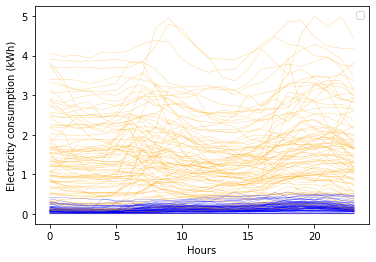

In [59]:
plt.figure()
for i in np.arange(len(X_train[np.array(y_train == 0)])):
  plt.plot(X_train[np.array(y_train == 0)].iloc[i], color = "blue", linewidth = 0.2)
for i in np.arange(len(X_train[np.array(y_train == 1)])):
  plt.plot(X_train[np.array(y_train == 1)].iloc[i], color = "orange", linewidth = 0.2)
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Electricity consumption (kWh)")

In [60]:
# Min max scaling (accross rows)

In [61]:
X_train_scaled_m_m = X_train.sub(X_train.min(axis=1), axis=0).divide(X_train.max(axis=1).sub(X_train.min(axis=1)), axis=0)

X_test_scaled_m_m = X_test.sub(X_test.min(axis=1), axis=0).divide(X_test.max(axis=1).sub(X_test.min(axis=1)), axis=0)

In [62]:
# Scaling data for every day (accrosss columns)

Text(0, 0.5, 'Electricity consumption (scaled)')

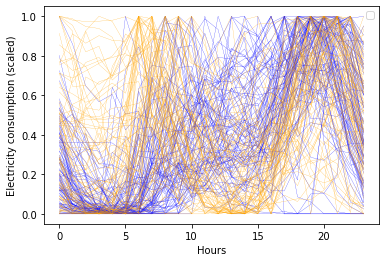

In [63]:
plt.figure()
for i in np.arange(len(X_train_scaled_m_m[np.array(y_train == 0)])):
  plt.plot(X_train_scaled_m_m[np.array(y_train == 0)].iloc[i], color = "blue", linewidth = 0.2)
for i in np.arange(len(X_train_scaled_m_m[np.array(y_train == 1)])):
  plt.plot(X_train_scaled_m_m[np.array(y_train == 1)].iloc[i], color = "orange", linewidth = 0.2)
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Electricity consumption (scaled)")

In [64]:
X_train_scaled_m_m.isna().sum().sum()
# No nas, this is good

0

In [65]:
# BASE CASE

In [66]:
X_train_scaled_m_m

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.449019,0.678365,0.923820,0.755742,0.696231,0.854385,1.000000,0.914532,0.863928,0.610770,...,0.088802,0.090227,0.155893,0.354871,0.452501,0.501495,0.565493,0.429000,0.359131,0.484395
1,0.284082,0.066872,0.048223,0.013128,0.005258,0.000000,0.327363,0.818682,0.528586,0.420463,...,0.309304,0.247642,0.308310,0.427668,0.651511,0.782772,0.809233,1.000000,0.900392,0.625789
2,0.201650,0.012963,0.055764,0.000000,0.047792,0.216095,0.515191,0.612272,0.433866,0.482036,...,0.307601,0.369425,0.346346,0.366295,0.530962,0.690581,0.882448,1.000000,0.989170,0.633013
3,0.562726,0.192598,0.137574,0.159011,0.099284,0.114060,0.061927,0.013794,0.084728,0.082087,...,0.096467,0.067348,0.050944,0.063323,0.076325,0.071787,0.120109,0.203672,1.000000,0.864292
4,0.437987,0.245302,0.243038,0.409657,0.279425,0.311181,0.243741,0.672952,1.000000,0.822686,...,0.000000,0.219087,0.302074,0.288615,0.449120,0.669117,0.791488,0.667277,0.498687,0.422988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.525163,0.446107,0.339509,0.153636,0.021532,0.000000,0.009076,0.024286,0.076177,0.221457,...,0.041124,0.094266,0.750939,1.000000,0.675576,0.657799,0.589196,0.592138,0.629319,0.621495
171,0.011416,0.041859,0.013783,0.152985,0.184035,0.250105,0.765926,0.940762,0.760622,0.728291,...,0.040930,0.000000,0.570114,0.542908,0.539971,0.552766,0.791844,1.000000,0.707257,0.273416
172,0.117783,0.115473,0.138568,0.109127,0.138568,0.129330,0.163972,0.122402,0.133949,0.200924,...,0.060046,0.023095,0.096998,0.618938,1.000000,0.836028,0.367206,0.115473,0.036952,0.000000
173,0.283142,0.112244,0.056965,0.000000,0.022496,0.300658,0.022336,0.034066,0.085609,0.134942,...,0.267314,0.261650,0.311023,0.391250,0.497509,0.685762,1.000000,0.969629,0.851277,0.567772


In [67]:
me_ratio = X_train_scaled_m_m.iloc[:,0:12].sum(axis = 1) / X_train_scaled_m_m.iloc[:,12:].sum(axis = 1)
me_ratio.to_csv("/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Hourly/me_ratio_train.csv", sep = ';', encoding = 'latin1', header = None)
me_ratio = np.array(me_ratio)
me_ratio = me_ratio.reshape(-1,1)
mask = (np.isinf(me_ratio) == False)# & (me_ratio < 8)
me_ratio = me_ratio[mask]
#scaler = MinMaxScaler()
#scaler.fit(me_ratio.reshape(-1,1))
#me_ratio = scaler.transform(me_ratio.reshape(-1,1))
y_train = np.array(y_train)
y_train_lr = y_train[mask]
me_ratio.shape

(174,)

In [68]:
y_train_lr = y_train_lr.ravel()

In [69]:
lr = LogisticRegression()
lr.fit(me_ratio.reshape(-1, 1), y_train_lr)

LogisticRegression()

In [70]:
lr.predict(me_ratio.reshape(-1, 1))

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0.])

In [71]:
from matplotlib.patches import Patch

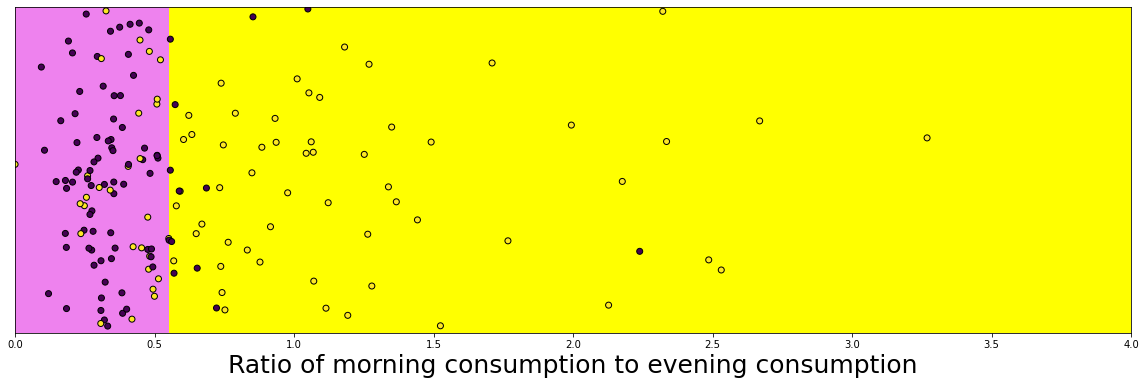

In [72]:
# Train set plotting
#y_values 
#plt.plot(line_x, line)
xx_train, yy_train = np.meshgrid(np.arange(0, 4.1, 0.1),
                                 np.arange(-3.1, 3.1, 0.1))
Z_train = lr.predict(xx_train.reshape(-1,1))
Z_train = Z_train.reshape(xx_train.shape)
plt.figure(figsize = (20,6))
plt.contourf(xx_train, yy_train, Z_train, levels = 1, colors = ["violet","yellow"])
plt.scatter(me_ratio, np.random.uniform(-3,3,len(me_ratio)), c = y_train_lr, edgecolor = "k")
patches = [ Patch(facecolor='violet', edgecolor='r',
                          label='No heat pump present'),
            Patch(facecolor='yellow', edgecolor='r',
                          label='Heat pump present')]
#plt.legend(patches, ["No heat pump present", "Heat pump present"], fontsize = 25)
plt.xlabel("Ratio of morning consumption to evening consumption", fontsize = 25)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
#plt.axis("off")
#plt.xlim(0,10)

In [73]:
me_ratio_test = X_test_scaled_m_m.iloc[:,0:12].sum(axis = 1) / X_test_scaled_m_m.iloc[:,12:].sum(axis = 1)
me_ratio_test.to_csv("/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Hourly/me_ratio_test.csv", sep = ';', encoding = 'latin1', header = None)
me_ratio_test
me_ratio_test = np.array(me_ratio_test)
me_ratio_test = me_ratio_test.reshape(-1,1)

In [74]:
me_ratio_test

array([[0.30778487],
       [0.57137754],
       [0.78643325],
       [0.2753057 ],
       [1.45604397],
       [1.6678273 ],
       [0.70119469],
       [0.46031592],
       [0.60126051],
       [0.34393892],
       [0.64490028],
       [0.42890314],
       [0.41635383],
       [0.23023115],
       [0.63410238],
       [0.4090436 ],
       [0.36950939],
       [0.03267552],
       [0.32810883],
       [1.3186884 ],
       [1.08107587],
       [0.60150065],
       [0.41140722],
       [0.15271364],
       [0.45408518],
       [1.34280513],
       [0.19831637],
       [0.1997136 ],
       [0.87456129],
       [0.33333327],
       [0.3084899 ],
       [0.46924998],
       [0.72219219],
       [0.80054344],
       [0.90000275],
       [0.62358331],
       [0.23700189],
       [2.70632768],
       [0.43867931],
       [0.77388863],
       [0.28319222],
       [0.29553687],
       [2.09502106],
       [0.75798669],
       [0.3476736 ],
       [0.45397032],
       [0.19978722],
       [0.290

In [75]:
me_ratio = np.array(me_ratio)
me_ratio = me_ratio.reshape(-1,1)
np.sum((lr.predict(me_ratio) == np.array(y_train_lr).ravel()) )/ len(me_ratio)

0.7816091954022989

In [76]:
np.sum((lr.predict(me_ratio_test) == np.array(y_test).ravel()) )/ len(me_ratio_test)

0.7457627118644068

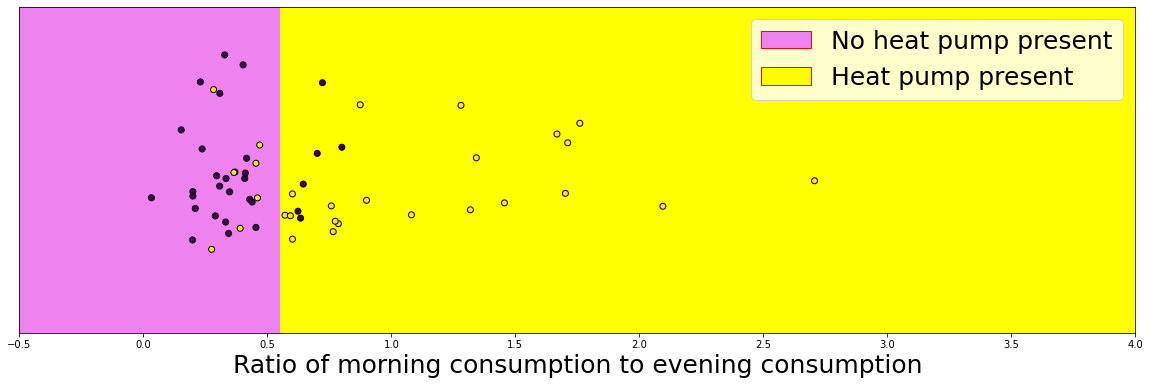

In [77]:
#  Test set plotting
#y_values 
line_x  = np.linspace(0,10)
line = lr.coef_*line_x + lr.intercept_
#plt.plot(line_x, line)
xx_train, yy_train = np.meshgrid(np.arange(-0.5, 4.1, 0.1),
                                 np.arange(-3.1, 3.3, 0.1))
Z_train = lr.predict(xx_train.reshape(-1,1))
Z_train = Z_train.reshape(xx_train.shape)
plt.figure(figsize = (20,6))
plt.contourf(xx_train, yy_train, Z_train, levels = 1, colors = ["violet","yellow"])
plt.scatter(me_ratio_test, np.random.randn(len(me_ratio_test)), c = y_test, edgecolor = "k")
plt.legend()
#plt.xlim(0,10)
patches = [ Patch(facecolor='violet', edgecolor='r',
                          label='No heat pump present'),
            Patch(facecolor='yellow', edgecolor='r',
                          label='Heat pump present')]
plt.legend(patches, ["No heat pump present", "Heat pump present"], fontsize = 25)
plt.xlabel("Ratio of morning consumption to evening consumption", fontsize = 25)
ax = plt.gca()
ax.get_yaxis().set_visible(False)

P-R AUC 0.8761610599445804
ROC AUC 0.8629032258064516


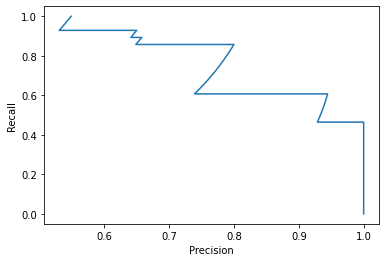

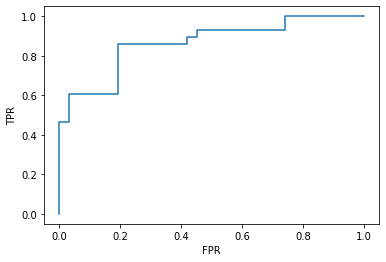

In [78]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = lr.predict_proba(me_ratio_test)
probs = probs[:,1]
y_test_pr = y_test.iloc[:,0]#[np.isnan(probs)==False]
#probs = probs[np.isnan(probs)==False]
precisions, recalls, threshholds = precision_recall_curve(y_test_pr, probs)
plt.figure()
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
print("P-R AUC", auc( recalls, precisions))
fpr, tpr, thresholds = roc_curve(y_test_pr, probs, pos_label=1)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
print("ROC AUC", auc( fpr, tpr))

In [79]:
#from sklearn.preprocessing import MinMaxScaler

In [80]:
# scaler = MinMaxScaler()
# #scaler.fit(np.array(X_train_scaled_m_m))
# X_train_scaled_m_m_mm = scaler.fit_transform(X_train_scaled_m_m)
# X_test_scaled_m_m_mm = scaler.fit_transform(X_test_scaled_m_m)

In [81]:
#np.sum(np.isnan(X_train_scaled_m_m_mm)) # Still no nas

In [82]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [83]:
n_timesteps, n_features, n_outputs = X_train.shape[1], 1, 1

In [84]:
n_timesteps

24

In [85]:


# Only return sequences if next layer is also LSTM!!
model_i = Sequential()
model_i.add(LSTM(512, input_shape=(n_timesteps,n_features))) # This number 8 ballpark
model_i.add(Dropout(0))
model_i.add(Dense(128, activation='relu')) # This number 8 ballpark
model_i.add(Dense(n_outputs, activation='sigmoid'))


In [86]:
#opt = Adam(lr= 0.0001)

In [87]:
model_i.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=METRICS)

In [88]:
model_i.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,118,465
Trainable params: 1,118,465
Non-trainable params: 0
_________________________________________________________________


In [89]:
verbose, epochs, batch_size = 1, 300, 25

In [90]:
np.array(X_train).shape

(174, 24)

In [91]:
np.sum(np.isnan(X_train_scaled_m_m)) # This should be zero otherwise the neural network shall not work

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [92]:
# Early stopping and saving

In [93]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from tensorflow.keras.models import load_model

In [95]:
es = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50)

In [96]:
mc = ModelCheckpoint('/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Hourly/best_untuned_model_nomm.h5', monitor = "val_loss", mode = "min", save_best_only = True)

In [97]:
%%time
np.random.seed(123)
set_random_seed(123)
history_i = model_i.fit(np.array(X_train_scaled_m_m), y_train, epochs=1, verbose=verbose, batch_size = batch_size, validation_split=0.2, callbacks = [es, mc])

6/6 [==============================] - 13s 513ms/step - loss: 0.6993 - tp: 32.0000 - fp: 40.0000 - tn: 30.0000 - fn: 37.0000 - accuracy: 0.4460 - precision: 0.4444 - recall: 0.4638 - auc: 0.4584 - prc: 0.4436 - val_loss: 0.6845 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 19.0000 - val_fn: 16.0000 - val_accuracy: 0.5429 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6711 - val_prc: 0.5354
CPU times: user 8.16 s, sys: 538 ms, total: 8.7 s
Wall time: 13.2 s


In [98]:
# load the saved model
saved_model = load_model('/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Hourly/best_untuned_model_nomm.h5') # This is doing exactly what I wanted done. Good!

In [99]:
saved_model.evaluate(X_test_scaled_m_m, y_test)

2/2 [==============================] - 1s 10ms/step - loss: 0.6812 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 31.0000 - fn: 28.0000 - accuracy: 0.5254 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7874 - prc: 0.7009


[0.6812481880187988,
 0.0,
 0.0,
 31.0,
 28.0,
 0.5254237055778503,
 0.0,
 0.0,
 0.7874424457550049,
 0.700873851776123]

In [100]:
# TUNING STARTS HERE

In [101]:
# Gotta install bayes_opt every time
!pip install keras
!pip install bayesian-optimization
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=b556a62fcd7ad2b93947c3a49a45daff62b32d501740886fb9a466a2d0d9902c
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [102]:
# Make scorer accuracy
#score_acc = make_scorer(accuracy_score)

In [103]:
# def nn_cl_bo(neurons, activation, optimizer, learning_rate, batch_size, dropout_rate, epochs):
  
#   optimizerL = ['SGD', 'Adam', 'RMSprop']
#   optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),'RMSprop':RMSprop(lr=learning_rate)}
#   activationL = ['relu', 'sigmoid', 'softmax', 'selu']
#   neurons = round(neurons)
#   activation = activationL[int(np.ceil(activation))]
#   optimizer = optimizerD[optimizerL[int(np.ceil(optimizer))]]
#   batch_size = round(batch_size)
#   epochs = round(epochs)
  
#   def nn_cl_fun():
#     nn = Sequential()
#     nn.add(LSTM(neurons, input_shape=(120,1))) #nn.add(LSTM(neurons, input_shape=(n_timesteps,n_features))) 
#     nn.add(Dropout(dropout_rate))
#     nn.add(Dense(neurons, activation= activation)) 
#     nn.add(Dense(1, activation='sigmoid'))
#     nn.compile(optimizer= optimizer ,loss='binary_crossentropy', metrics=METRICS)
#     return nn
#   es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
#   nn = KerasClassifier(build_fn = nn_cl_fun, epochs = 100, batch_size = round(batch_size), verbose = 0)

#   kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
#   score = cross_val_score(nn, X_train_scaled_m_m_mm, y_train, scoring = score_acc, cv = kfold, fit_params={'callbacks':[es]}).mean()
#   return score

In [104]:
# params_nn = {'neurons' : (50,500), 
#              "activation" : (0,3),
#              "optimizer" : (0,2), 
#              "learning_rate" : (0.01,1), 
#              "batch_size" : (10, len(X_train)), 
#              "dropout_rate" : (0.01,0.3),
#              "epochs" : (20,150)}

In [105]:
# nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state = 123)

In [106]:
# %%time
# nn_bo.maximize(init_points = 25, n_iter = 4)

In [107]:
# nn_bo.max

In [108]:
# int(np.ceil(0.1))

In [109]:
# GRID SEARCH

In [110]:
#!pip install scikeras
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [111]:
model_i = Sequential()
model_i.add(LSTM(128, input_shape=(n_timesteps,n_features))) # This number 8 ballpark
model_i.add(Dropout(0.3))
model_i.add(Dense(128, activation='relu')) # This number 8 ballpark
model_i.add(Dense(n_outputs, activation='sigmoid'))

In [112]:
model_i.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [113]:
def create_model(neurons, optimizer, learning_rate, activation, dropout_rate, LSTM_layers):
  opt_D = {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate), 'RMSprop': RMSprop(lr=learning_rate)}
  opt = opt_D[optimizer]
  nn = Sequential()
  for i in np.arange(0, LSTM_layers):
    if i < LSTM_layers - 1:
      nn.add(LSTM(neurons, input_shape=(24,1), return_sequences= True))
      #nn.add(LSTM(neurons, input_shape=(120,1), return_sequences= False))
      nn.add(Dropout(dropout_rate))
    if i == LSTM_layers - 1:
        nn.add(LSTM(neurons, input_shape=(24,1), return_sequences= False))
        nn.add(Dropout(dropout_rate))
  nn.add(Dense(neurons, activation = activation )) 
  nn.add(Dense(1, activation='sigmoid'))
  nn.compile(optimizer= opt, loss='binary_crossentropy', metrics= ["accuracy"])
  return nn

In [114]:
create_model(neurons = 128, optimizer = "Adam", learning_rate = 0.001, activation = "relu", dropout_rate = 0, LSTM_layers = 1).summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [115]:
create_model(neurons = 128, optimizer = "Adam", learning_rate = 0.01, activation = "relu", dropout_rate = 0.1, LSTM_layers = 2).summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 128)           66560     
                                                                 
 dropout_3 (Dropout)         (None, 24, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 214,785
Trainable params: 214,785
Non-tr

In [116]:
es1 = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20)
mc1 = ModelCheckpoint('/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Hourly/best_tuned_model_nomm_1.h5', monitor = "val_loss", mode = "min", save_best_only = True)


In [117]:
model = KerasClassifier(build_fn=create_model, epochs = 300, verbose = 0, callbacks = [es1, mc1])

In [118]:
model_f_test = create_model(neurons = 128, optimizer = "Adam", learning_rate = 0.0001, activation = "relu", dropout_rate = 0, LSTM_layers = 1)

In [119]:
model_f_test.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [120]:
history_f_test = model_f_test.fit(np.array(X_train_scaled_m_m), y_train, epochs=epochs, verbose=verbose, batch_size = batch_size, validation_split=0.2, callbacks = [es1, mc1])

Epoch 1/300
6/6 [==============================] - 4s 416ms/step - loss: 0.6975 - accuracy: 0.4964 - val_loss: 0.6984 - val_accuracy: 0.4571
Epoch 2/300
6/6 [==============================] - 0s 19ms/step - loss: 0.6964 - accuracy: 0.4964 - val_loss: 0.6967 - val_accuracy: 0.4571
Epoch 3/300
6/6 [==============================] - 0s 23ms/step - loss: 0.6949 - accuracy: 0.4964 - val_loss: 0.6956 - val_accuracy: 0.4571
Epoch 4/300
6/6 [==============================] - 0s 19ms/step - loss: 0.6944 - accuracy: 0.5036 - val_loss: 0.6946 - val_accuracy: 0.4857
Epoch 5/300
6/6 [==============================] - 0s 21ms/step - loss: 0.6937 - accuracy: 0.5036 - val_loss: 0.6940 - val_accuracy: 0.4857
Epoch 6/300
6/6 [==============================] - 0s 21ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6935 - val_accuracy: 0.4286
Epoch 7/300
6/6 [==============================] - 0s 21ms/step - loss: 0.6930 - accuracy: 0.5036 - val_loss: 0.6928 - val_accuracy: 0.5429
Epoch 8/300
6/6 [==

In [121]:
model_f_test.evaluate(X_test_scaled_m_m, y_test)

2/2 [==============================] - 1s 8ms/step - loss: 0.4534 - accuracy: 0.7797


[0.45344510674476624, 0.7796609997749329]

In [122]:
4*3*4*4*4*7*4*3*14*0.05/3600 # Original expected time with halving search

12.544

In [123]:
4*3*3*6*4*3*14*0.05/3600 # Expected time with halving search with parameters reduced
batch_size

25

In [124]:
import warnings
from sklearn.metrics import accuracy_score
scoring = {'accuracy': make_scorer(accuracy_score, needs_proba=True)}

In [ ]:

%%time
np.random.seed(123)
set_random_seed(123)
# import absl.logging
# absl.logging.set_verbosity(absl.logging.ERROR) # Silences warnings
# import logging
# logger = logging.getLogger()
# logger.setLevel(logging.CRITICAL) # Silence info
import logging, sys
logging.disable(sys.maxsize)
neurons_L = [128,512]
opt_L = ["Adam", "SGD", "RMSprop"]
lr_L = [ 0.0001, 0.001]
activation_L = ['relu', 'tanh']#, 'tanh']#, "selu"]
dropout_rate_L = [0.0, 0.3, 0.5]
LSTM_layers_L = [1, 2, 4]#,5,6,7]
batch_size_L = [32, 64]#, 64]#, 128]
epochs_L = [100]
param_grid = dict(neurons=neurons_L, optimizer = opt_L, learning_rate = lr_L, activation = activation_L, dropout_rate = dropout_rate_L, LSTM_layers = LSTM_layers_L, batch_size = batch_size_L, epochs = epochs_L )
grid = HalvingGridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring = "accuracy", verbose = 10 )
results = grid.fit(X_train_scaled_m_m, y_train)

n_iterations: 4
n_required_iterations: 6
n_possible_iterations: 4
min_resources_: 6
max_resources_: 174
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 432
n_resources: 6
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
----------
iter: 1
n_candidates: 144
n_resources: 18
Fitting 3 folds for each of 144 candidates, totalling 432 fits
----------
iter: 2
n_candidates: 48
n_resources: 54
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 3
n_candidates: 16
n_resources: 162
Fitting 3 folds for each of 16 candidates, totalling 48 fits
CPU times: user 11h 44min 48s, sys: 1h 24min 46s, total: 13h 9min 34s
Wall time: 11h 10min 6s
Compiler : 311 ms


In [ ]:
results

HalvingGridSearchCV(cv=3,
                    estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fdc1da02d50>,
                    n_jobs=-1,
                    param_grid={'LSTM_layers': [1, 2, 4],
                                'activation': ['relu', 'tanh'],
                                'batch_size': [32, 64],
                                'dropout_rate': [0.0, 0.3, 0.5],
                                'epochs': [100],
                                'learning_rate': [0.0001, 0.001],
                                'neurons': [128, 512],
                                'optimizer': ['Adam', 'SGD', 'RMSprop']},
                    scoring='accuracy', verbose=10)

In [ ]:
results.cv_results_

{'iter': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
results.best_params_

{'LSTM_layers': 4,
 'activation': 'relu',
 'batch_size': 32,
 'dropout_rate': 0.5,
 'epochs': 100,
 'learning_rate': 0.0001,
 'neurons': 512,
 'optimizer': 'RMSprop'}

In [ ]:
results.best_score_

0.7777777777777778

In [126]:
#best_tuned_model = create_model(neurons = results.best_params_["neurons"], optimizer = results.best_params_["optimizer"], activation = results.best_params_["activation"], dropout_rate = results.best_params_["dropout_rate"], LSTM_layers = results.best_params_["LSTM_layers"], learning_rate = results.best_params_["learning_rate"])# learning rate absent
best_tuned_model = create_model(neurons = 128, optimizer = "RMSprop", activation = "tanh", dropout_rate = 0.3, LSTM_layers = 2, learning_rate = 0.001)# learning rate absent

In [127]:
best_tuned_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 24, 128)           66560     
                                                                 
 dropout_6 (Dropout)         (None, 24, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 214,785
Trainable params: 214,785
Non-tr

In [128]:
epochs = 300

In [129]:
%%time
np.random.seed(123)
set_random_seed(123)
history_best_tuned = best_tuned_model.fit(np.array(X_train_scaled_m_m), y_train, epochs=epochs, verbose=verbose, batch_size = batch_size, validation_split=0.2, callbacks = [es1, mc1])

Epoch 1/300
6/6 [==============================] - 5s 195ms/step - loss: 0.7016 - accuracy: 0.4892 - val_loss: 0.6856 - val_accuracy: 0.7429
Epoch 2/300
6/6 [==============================] - 0s 14ms/step - loss: 0.6750 - accuracy: 0.5755 - val_loss: 0.8904 - val_accuracy: 0.4571
Epoch 3/300
6/6 [==============================] - 1s 100ms/step - loss: 0.6482 - accuracy: 0.6906 - val_loss: 0.5616 - val_accuracy: 0.7714
Epoch 4/300
6/6 [==============================] - 0s 14ms/step - loss: 0.4875 - accuracy: 0.7842 - val_loss: 0.6872 - val_accuracy: 0.7143
Epoch 5/300
6/6 [==============================] - 0s 13ms/step - loss: 0.4481 - accuracy: 0.7914 - val_loss: 0.6374 - val_accuracy: 0.7429
Epoch 6/300
6/6 [==============================] - 0s 13ms/step - loss: 0.4765 - accuracy: 0.7626 - val_loss: 0.6439 - val_accuracy: 0.7429
Epoch 7/300
6/6 [==============================] - 0s 13ms/step - loss: 0.4721 - accuracy: 0.7554 - val_loss: 0.7645 - val_accuracy: 0.6857
Epoch 8/300
6/6 [=

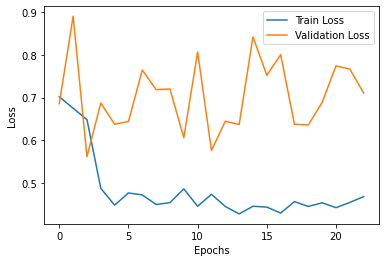

In [130]:
plt.figure()
plt.plot(history_best_tuned.history["loss"], label = "Train Loss")
plt.plot(history_best_tuned.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

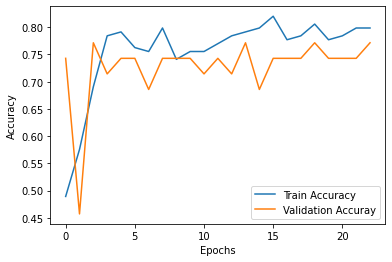

In [131]:
plt.figure()
plt.plot(history_best_tuned.history["accuracy"], label = "Train Accuracy")
plt.plot(history_best_tuned.history["val_accuracy"], label = "Validation Accuray")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
#while True: pass
best_tuned_model.summary()

KeyboardInterrupt: ignored

In [ ]:
best_tuned_model.evaluate(X_test_scaled_m_m, y_test)

2/2 [==============================] - 1s 16ms/step - loss: 0.4401 - accuracy: 0.7627


[0.44010454416275024, 0.7627118825912476]

In [ ]:
#best_tuned_model.save('/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Hourly/best_tuned_model_nomm_1.h5')

In [132]:
best_tuned_saved_model = load_model('/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Hourly/best_tuned_model_nomm_1.h5')

In [133]:
best_tuned_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 24, 128)           66560     
                                                                 
 dropout_6 (Dropout)         (None, 24, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 214,785
Trainable params: 214,785
Non-tr

In [134]:
best_tuned_model.evaluate(X_test_scaled_m_m, y_test)

2/2 [==============================] - 1s 7ms/step - loss: 0.4261 - accuracy: 0.7627


[0.42611002922058105, 0.7627118825912476]

In [135]:
best_tuned_model.evaluate(X_train_scaled_m_m, y_train)

6/6 [==============================] - 1s 5ms/step - loss: 0.4755 - accuracy: 0.8046


[0.4755386412143707, 0.8045976758003235]

P-R AUC 0.8921584917466341
P-R AUC 0.8917050691244239


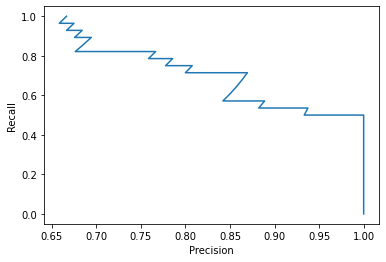

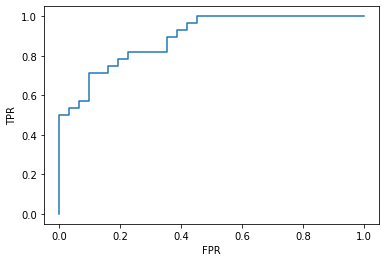

In [137]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = best_tuned_saved_model.predict(X_test_scaled_m_m).ravel()
y_test_pr = y_test[np.isnan(probs)==False]
probs = probs[np.isnan(probs)==False]
precisions, recalls, threshholds = precision_recall_curve(y_test_pr, probs)
plt.figure()
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
print("P-R AUC", auc( recalls, precisions))
fpr, tpr, thresholds = roc_curve(y_test_pr, probs, pos_label=1)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
print("ROC AUC", auc( fpr, tpr))